In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
from sklearn.model_selection import KFold
%matplotlib inline

In [3]:
with open('rookies3.pickle', 'rb') as to_read:
    df = pickle.load(to_read)

In [3]:
df.head()

,PLAYER,FIRST_YEAR,AST,BLK,DRB,EFG_PCT,FG2_PCT,FG2,FG2A,FG3_PCT,...,BPM,DRB_PCT,STL_PCT,TOV_PCT,TS_PCT,USG_PCT,DBPM,FTA_PER_FGA_PCT,AST_PCT,ORB_PCT
0,Aaron Brooks,2008,1.7,0.1,0.8,0.493,0.491,1.1,2.3,0.330,...,-1.8,7.9,1.1,15.1,0.535,21.8,-1.8,0.218,23.5,2.5
1,Aaron Gordon,2015,0.7,0.5,2.6,0.478,0.500,1.7,3.4,0.271,...,-2.8,17.8,1.3,13.9,0.517,15.5,0.0,0.293,6.3,6.4
2,Aaron Gray,2008,0.7,0.3,1.6,0.505,0.507,1.7,3.3,0.000,...,-2.0,18.7,1.8,18.7,0.529,22.0,0.4,0.485,11.4,12.5
3,Acie Law,2008,2.0,0.0,0.8,0.416,0.433,1.6,3.6,0.206,...,-6.7,6.0,1.8,17.8,0.455,16.5,-2.6,0.203,20.4,1.6
4,Al Horford,2008,1.5,0.9,6.6,0.499,0.502,4.1,8.2,0.000,...,-0.2,24.5,1.2,15.3,0.539,16.0,1.1,0.317,7.9,11.4


In [4]:
df.columns

Index(['PLAYER', 'FIRST_YEAR', 'AST', 'BLK', 'DRB', 'EFG_PCT', 'FG2_PCT',
       'FG2', 'FG2A', 'FG3_PCT', 'FG3', 'FG3A', 'FG_PCT', 'FG', 'FGA',
       'FT_PCT', 'FT', 'FTA', 'MP', 'ORB', 'PF', 'PTS', 'STL', 'TOV', 'TRB',
       'DRAFT_YEAR', 'ROUND', 'PICK_OVERALL', 'DRAFT_TEAM', 'AGE', 'POS',
       'BIRTH_COUNTRY', 'COLLEGE', 'FIFTH_YEAR', 'SALARY', 'G', 'GS', 'DWS',
       'WS', 'OWS', 'PER', 'BLK_PCT', 'VORP', 'TRB_PCT', 'FG3A_PER_FGA_PCT',
       'OBPM', 'WS_PER_48', 'BPM', 'DRB_PCT', 'STL_PCT', 'TOV_PCT', 'TS_PCT',
       'USG_PCT', 'DBPM', 'FTA_PER_FGA_PCT', 'AST_PCT', 'ORB_PCT'],
      dtype='object')

In [52]:
num = df[['SALARY','AST','BLK','DRB','EFG_PCT','FG2_PCT','FG2','FG2A','FG3_PCT','FG3','FG3A','FG_PCT','FG','FGA',
         'FT_PCT','FT','FTA','MP','ORB','PF','PTS','STL','TOV','TRB','G','GS',
         'PER','TS_PCT','FG3A_PER_FGA_PCT','FTA_PER_FGA_PCT','ORB_PCT','DRB_PCT','TRB_PCT','AST_PCT',
            'STL_PCT','BLK_PCT','TOV_PCT','USG_PCT','OWS','DWS','WS','WS_PER_48','OBPM','DBPM','BPM','VORP']]

In [51]:

lasso = Lasso(alpha=129000)

X = num.iloc[:,1:]
y = num.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)
    
list(zip(X.columns, lasso.coef_))

[('AST', -142070.9184255689),
 ('BLK', 572506.0973509485),
 ('DRB', 108342.60569065288),
 ('EFG_PCT', 0.0),
 ('FG2_PCT', 0.0),
 ('FG2', 1089489.4705968874),
 ('FG2A', 0.0),
 ('FG3_PCT', 850087.8459053494),
 ('FG3', 0.0),
 ('FG3A', 0.0),
 ('FG_PCT', -0.0),
 ('FG', 0.0),
 ('FGA', 0.0),
 ('FT_PCT', -230495.423066635),
 ('FT', 0.0),
 ('FTA', 0.0),
 ('MP', 0.0),
 ('ORB', 0.0),
 ('PF', -0.0),
 ('PTS', 0.0),
 ('STL', 0.0),
 ('TOV', 986782.8561089212),
 ('TRB', 288158.9993287517),
 ('G', 0.0),
 ('GS', 0.0),
 ('PER', -0.0),
 ('TS_PCT', -503048.43375525397),
 ('FG3A_PER_FGA_PCT', 532045.8847370273),
 ('FTA_PER_FGA_PCT', 573881.4919189989),
 ('ORB_PCT', -283633.4553574448),
 ('DRB_PCT', 0.0),
 ('TRB_PCT', -0.0),
 ('AST_PCT', -335849.56081356783),
 ('STL_PCT', 192674.09281828304),
 ('BLK_PCT', -0.0),
 ('TOV_PCT', 0.0),
 ('USG_PCT', -0.0),
 ('OWS', 49690.00641371954),
 ('DWS', -23474.02823753266),
 ('WS', 0.0),
 ('WS_PER_48', -0.0),
 ('OBPM', 0.0),
 ('DBPM', 432057.5021824159),
 ('BPM', 0.0),
 ('VO

In [53]:
alphas = np.arange(100000, 400000, 100)

X = num.iloc[:,1:]
y = num.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lcv = LassoCV(alphas = alphas, cv=5)
lcv.fit(X_train, y_train)

print(lcv.alpha_)
print(lcv.score(X_test, y_test))
list(zip(X.columns, lcv.coef_))

331200
0.12922221517100851


[('AST', -0.0),
 ('BLK', 253280.44362507312),
 ('DRB', 516441.7096576316),
 ('EFG_PCT', -0.0),
 ('FG2_PCT', -0.0),
 ('FG2', 0.0),
 ('FG2A', 0.0),
 ('FG3_PCT', 401216.75146050815),
 ('FG3', 0.0),
 ('FG3A', 0.0),
 ('FG_PCT', -0.0),
 ('FG', 280524.0064819869),
 ('FGA', 0.0),
 ('FT_PCT', -1702.8207855905289),
 ('FT', 0.0),
 ('FTA', 472332.9890570578),
 ('MP', 0.0),
 ('ORB', 0.0),
 ('PF', 0.0),
 ('PTS', 0.0),
 ('STL', 0.0),
 ('TOV', 728423.0570971847),
 ('TRB', 0.0),
 ('G', 0.0),
 ('GS', 139903.56346467262),
 ('PER', -0.0),
 ('TS_PCT', -0.0),
 ('FG3A_PER_FGA_PCT', 0.0),
 ('FTA_PER_FGA_PCT', 0.0),
 ('ORB_PCT', -0.0),
 ('DRB_PCT', 0.0),
 ('TRB_PCT', -0.0),
 ('AST_PCT', -0.0),
 ('STL_PCT', 4639.395086227618),
 ('BLK_PCT', 0.0),
 ('TOV_PCT', 0.0),
 ('USG_PCT', 0.0),
 ('OWS', 0.0),
 ('DWS', 0.0),
 ('WS', 0.0),
 ('WS_PER_48', -0.0),
 ('OBPM', 0.0),
 ('DBPM', 241790.72483498187),
 ('BPM', 0.0),
 ('VORP', 392385.0407991431)]

In [60]:
new_df = num[['SALARY','GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK','VORP']]

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lm = LinearRegression()

np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2'))

0.05773347791256671

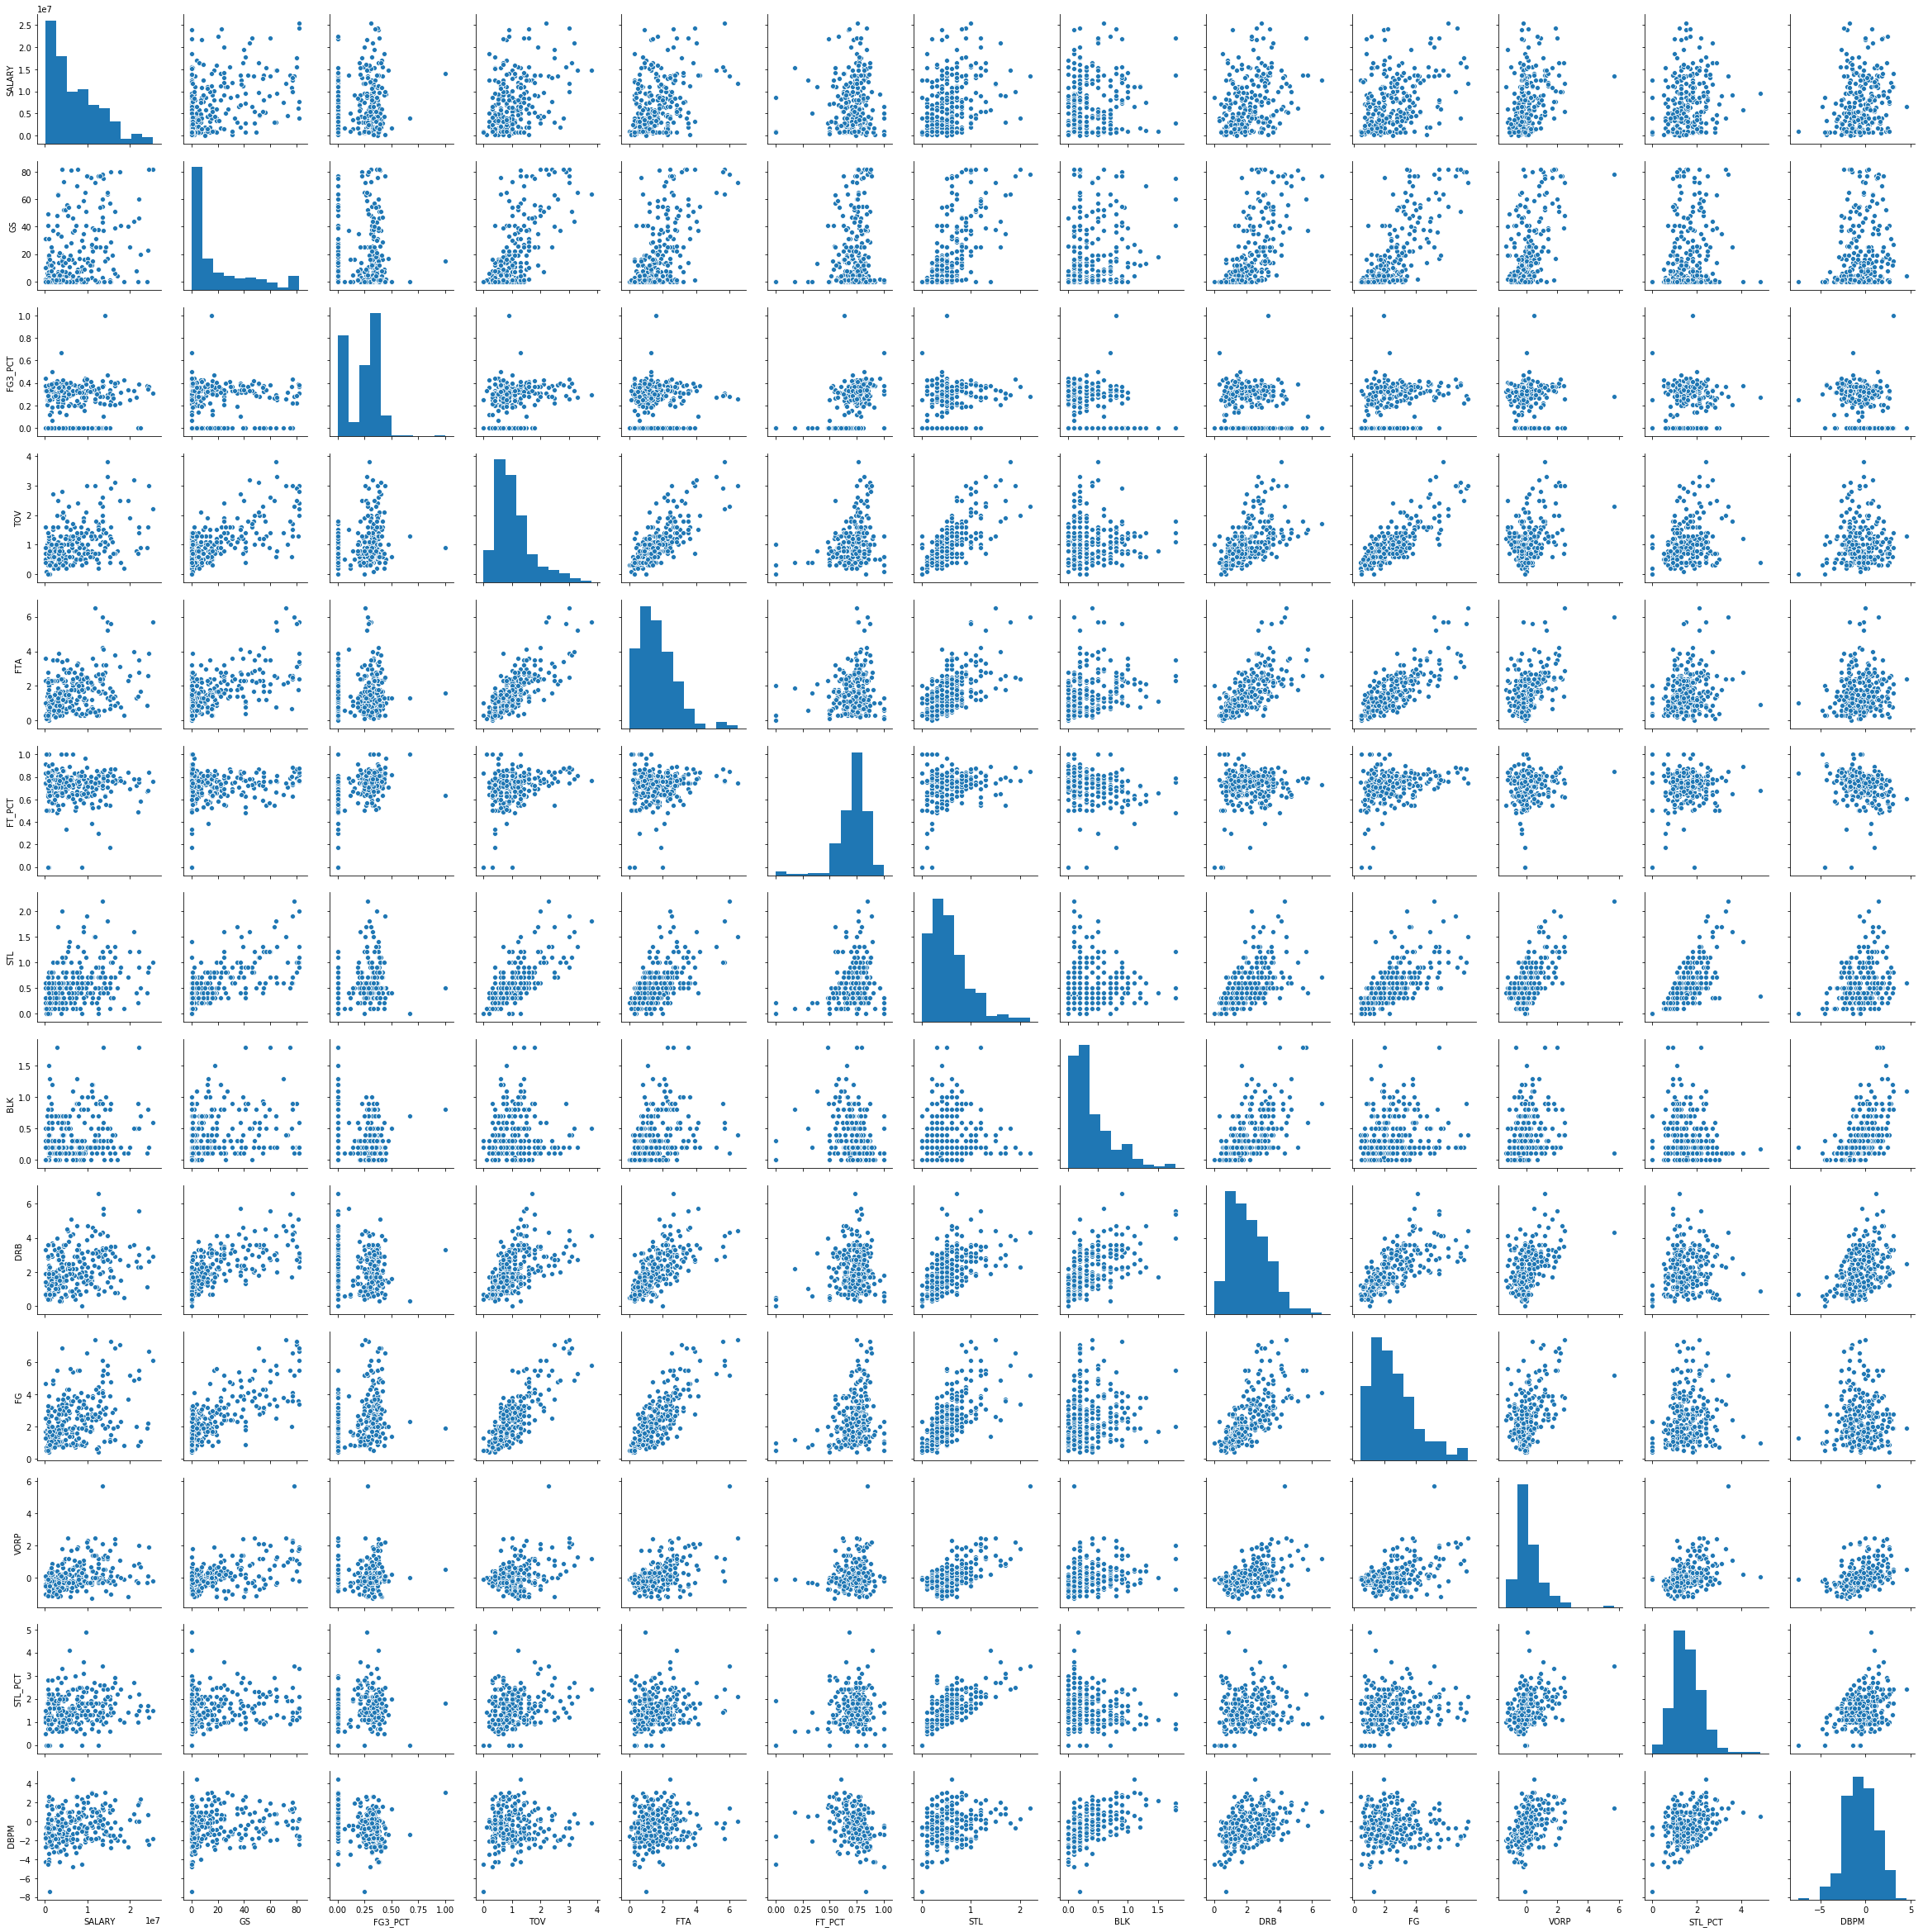

In [59]:
new_df = num[['SALARY','GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK', 'DRB', 'FG','VORP','STL_PCT','DBPM']]

sns.pairplot(new_df)

In [56]:
new_df = num[['SALARY','GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK', 'DRB', 'FG','VORP','STL_PCT','DBPM']]
features = ['GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK','DRB','FG','VORP','STL_PCT','DBPM']

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

kf = KFold(n_splits=5, shuffle=True, random_state=43)

max_rsquared = 0
keep = []

for feature in features:
    keep.append(feature)
    X = new_df.loc[:,keep]
    rsq = np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2'))
    if rsq > max_rsquared:
        max_rsquared = rsq
    else:
        keep.pop()

print(keep)
print(max_rsquared)

['GS', 'FG3_PCT', 'TOV', 'FTA', 'FT_PCT', 'BLK', 'VORP']
0.17322086914540086


In [57]:
num = df[['SALARY','G','GS','MP','FG','FGA','FG_PCT','FG3','FG3A','FG3_PCT','FG2','FG2A','FG2_PCT','FT','FTA',
            'FT_PCT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS',
         'PER','TS_PCT','FG3A_PER_FGA_PCT','FTA_PER_FGA_PCT','ORB_PCT','DRB_PCT','TRB_PCT','AST_PCT',
            'STL_PCT','BLK_PCT','TOV_PCT','USG_PCT','OWS','DWS','WS','WS_PER_48','OBPM','DBPM','BPM','VORP']]
features = ['G','GS','MP','FG','FGA','FG_PCT','FG3','FG3A','FG3_PCT','FG2','FG2A','FG2_PCT','FT','FTA',
            'FT_PCT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS',
         'PER','TS_PCT','FG3A_PER_FGA_PCT','FTA_PER_FGA_PCT','ORB_PCT','DRB_PCT','TRB_PCT','AST_PCT',
            'STL_PCT','BLK_PCT','TOV_PCT','USG_PCT','OWS','DWS','WS','WS_PER_48','OBPM','DBPM','BPM','VORP']

X = num.iloc[:,1:]
y = num.iloc[:,0]

lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=43)

max_rsquared = 0
keep = []

for feature in features:
    keep.append(feature)
    X = num.loc[:,keep]
    rsq = np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2'))
    if rsq > max_rsquared:
        max_rsquared = rsq
    else:
        keep.pop()
        
print(keep)
print(max_rsquared)

['G', 'GS', 'MP', 'FT', 'FTA', 'PF', 'DWS', 'DBPM', 'VORP']
0.16556371501024655


In [23]:
X = num.iloc[:,1:]
y = num.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

lm = LinearRegression()

lm.fit(X_train, y_train)
lm.score(X_test, y_test)

-0.10007796972540439

In [13]:
five = num[['SALARY','PTS','AST','TRB','BLK','STL']]

X = five.iloc[:,1:]
y = five.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

lm = LinearRegression()

lm.fit(X_train, y_train)
lm.score(X_train, y_train)

0.19111882964937366

In [16]:
df.columns

Index(['PLAYER', 'FIRST_YEAR', 'AST', 'BLK', 'DRB', 'EFG_PCT', 'FG2_PCT',
       'FG2', 'FG2A', 'FG3_PCT', 'FG3', 'FG3A', 'FG_PCT', 'FG', 'FGA',
       'FT_PCT', 'FT', 'FTA', 'MP', 'ORB', 'PF', 'PTS', 'STL', 'TOV', 'TRB',
       'DRAFT_YEAR', 'ROUND', 'PICK_OVERALL', 'DRAFT_TEAM', 'AGE', 'POS',
       'BIRTH_COUNTRY', 'COLLEGE', 'FIFTH_YEAR', 'SALARY', 'G', 'GS', 'DWS',
       'WS', 'OWS', 'PER', 'BLK_PCT', 'VORP', 'TRB_PCT', 'FG3A_PER_FGA_PCT',
       'OBPM', 'WS_PER_48', 'BPM', 'DRB_PCT', 'STL_PCT', 'TOV_PCT', 'TS_PCT',
       'USG_PCT', 'DBPM', 'FTA_PER_FGA_PCT', 'AST_PCT', 'ORB_PCT'],
      dtype='object')

In [9]:
gamestats = num[['SALARY','G','GS','MP','FG','FGA','FG_PCT','FG3','FG3A','FG3_PCT','FG2','FG2A','FG2_PCT','EFG_PCT',
                'FT','FTA','FT_PCT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']]

In [14]:
X = gamestats.iloc[:,1:]
y = gamestats.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

lm = LinearRegression()

lm.fit(X_train, y_train)
lm.score(X_test, y_test)

-0.010226998892661987

In [27]:
lasso = Lasso(alpha=1000)

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

lasso.fit(X_train_sc, y_train)
lasso.score(X_test_sc, y_test)

/Users/Stephen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


-0.004741719195449301